In [1]:
import sys
sys.path.append("../functions")
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats
from utils import *
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

#### Read the data

In [5]:
dataset_type ='HCPD'  # select the dataset: HCPA, HCPD, ABCD
SC_mask_type = 25 #  select the mask type: 25, 75


SC_FC_inter_r = np.load('../data/result_out_2/' + dataset_type + '/SC/'+dataset_type + '_inter_matrix_SC_FC_' + str(SC_mask_type) + '.npy')
match_r_SC, mismatch_r_SC, t_SC, p_SC = get_match_mismatch_t_p(SC_FC_inter_r)

PredFC_FC_inter_r = np.load('../data/result_out_2/' + dataset_type + '/Pred/'+dataset_type + '_inter_matrix_Pred_FC.npy')
match_r_PredFC, mismatch_r_PredFC, t_PredFC, p_PredFC = get_match_mismatch_t_p(PredFC_FC_inter_r)

print('log(SC)-FC: group: {:.4f}, ind: {:.4f},  all: {:.4f}, t: {:.4f}, p: {:.4f}'.format(
    np.mean(mismatch_r_SC), np.mean(match_r_SC-mismatch_r_SC), np.mean(match_r_SC), t_SC, p_SC))
print('PredFC-FC: group: {:.4f}, ind: {:.4f},  all: {:.4f}, t: {:.4f}, p: {:.4f}'.format(
    np.mean(mismatch_r_PredFC), np.mean(match_r_PredFC-mismatch_r_PredFC), np.mean(match_r_PredFC), t_PredFC, p_PredFC))

log(SC)-FC: group: 0.3414, ind: 0.0033,  all: 0.3448, t: 4.5042, p: 0.0000
PredFC-FC: group: 0.7007, ind: 0.0147,  all: 0.7155, t: 10.3760, p: 0.0000


#### Plot the matched and mismatched coupling

In [6]:
sns_colors = [sns.color_palette("RdBu", 16)[11],  sns.color_palette(palette='Pastel1')[2],  sns.color_palette(palette='Pastel1')[0], sns.color_palette("RdBu",16)[4], sns.hls_palette(24, l=.7, s=.8)[23], sns.color_palette("RdBu",16)[12]]
bar_colors = [sns_colors[0], sns_colors[3]]

log(SC)-FC:  4.504203097151282 8.704083404746424e-06
PredFC-FC:  10.376019716566965 1.585077908677687e-20


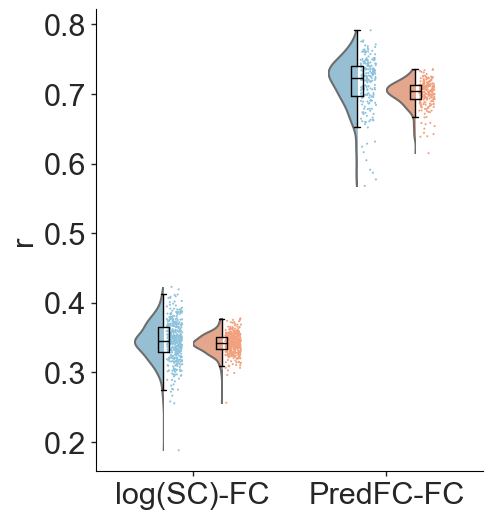

In [28]:
df_ind_corr = {}
df_ind_corr['Mode'] = []
df_ind_corr['Correlation'] = []
df_ind_corr['Type'] = []
corr_SC_FC_match = []
corr_SC_FC_mismatch = []

corr_PredFC_FC_match = []
corr_PredFC_FC_mismatch = []



for i in range(len(match_r_SC)):
        df_ind_corr['Correlation'].append(match_r_SC[i])
        df_ind_corr['Mode'].append('Match')
        df_ind_corr['Type'].append('log(SC)-FC')
        corr_SC_FC_match.append(match_r_SC[i])


        df_ind_corr['Correlation'].append(mismatch_r_SC[i])
        df_ind_corr['Mode'].append('Mismatch')
        df_ind_corr['Type'].append('log(SC)-FC')
        corr_SC_FC_mismatch.append(mismatch_r_SC[i])


for i in range(len(match_r_PredFC)):
        df_ind_corr['Correlation'].append(match_r_PredFC[i])
        df_ind_corr['Mode'].append('Match')
        df_ind_corr['Type'].append('PredFC-FC')
        corr_PredFC_FC_match.append(match_r_PredFC[i])


        df_ind_corr['Correlation'].append(mismatch_r_PredFC[i])
        df_ind_corr['Mode'].append('Mismatch')
        df_ind_corr['Type'].append('PredFC-FC')
        corr_PredFC_FC_mismatch.append(mismatch_r_PredFC[i])

df_ind_corr = pd.DataFrame(df_ind_corr)




fig, _= plt.subplots(figsize=(5,6))
ax = sns.violinplot(x="Type",y="Correlation",hue="Mode", data=df_ind_corr, dodge=True,
                    palette=[sns_colors[0], sns_colors[3]], width=0.6, cut=0,
                    scale="width", inner=None, zorder=3)
xticks = ax.get_xticks()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x_index = []
for violin in ax.collections:
    bbox = violin.get_paths()[0].get_extents()
    x0, y0, width, height = bbox.bounds
    violin.set_clip_path(plt.Rectangle((x0, y0), width / 2, height, transform=ax.transData))
    x_index.append(x0+ width / 2)
old_len_collections = len(ax.collections)

plt.boxplot([corr_SC_FC_match, corr_SC_FC_mismatch, corr_PredFC_FC_match, corr_PredFC_FC_mismatch], positions=x_index, widths=0.06, showfliers=False, medianprops=dict(color='black'))

sns.stripplot(x="Type", y="Correlation", data=df_ind_corr[df_ind_corr['Mode']=='Match'], hue="Mode",palette=[sns_colors[0]], dodge=True, ax=ax,size=1.5, jitter=0.04, alpha=1, zorder=1)

sns.stripplot(x="Type", y="Correlation", data=df_ind_corr[df_ind_corr['Mode']=='Mismatch'], hue="Mode",palette=[sns_colors[3]], dodge=True, ax=ax,size=1.5, jitter=0.04, alpha=1, zorder=1)
plt.grid(False)


for (ind, dots) in enumerate(ax.collections[old_len_collections:]):
    if ind==0 or ind==1:
        dots.set_offsets(dots.get_offsets() + np.array([-0.093, 0]))
    else:
        dots.set_offsets(dots.get_offsets() + np.array([.21, 0]))

# plt.legend(loc='right', ncol=4)
ax.legend_.remove()
# plt.xticks(fontsize=22)
ax.set_xticks(xticks)
ax.set_xticklabels(['log(SC)-FC','PredFC-FC' ])
plt.xlabel(None)
plt.ylabel('r',fontsize=22)
plt.yticks(rotation=0, fontsize=22)
# plt.ylim([0,0.8])
plt.yticks(np.arange(0.2, 0.81, 0.1))
ax.tick_params(bottom=True, left=True, width=1)

ax.set_xlim(xlim)
# ax.set_ylim(ylim)
# plt.tight_layout()
sns.despine()
# plt.savefig('result_plot/Fig3/' + dataset_type +'_match_mismatch_0927.png', dpi=360, transparent=True ,bbox_inches = 'tight')
plt.show()

#### Plot the group and ind effect

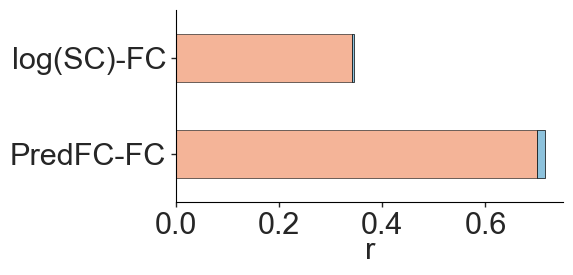

In [29]:
SC_FC_ind =  np.mean(corr_SC_FC_match)
SC_FC_gp = np.mean(corr_SC_FC_mismatch)
predFC_FC_ind = np.mean(corr_PredFC_FC_match)
predFC_FC_gp = np.mean(corr_PredFC_FC_mismatch)

a0 = np.array([SC_FC_gp])
b0 = np.array([SC_FC_ind - SC_FC_gp])
a1 = np.array([predFC_FC_gp])
b1 = np.array([predFC_FC_ind - predFC_FC_gp])

fig, ax1  = plt.subplots(figsize=(5,2.5))
height =0.5
x = [0.5, 1.5]
ax1.barh(x[1], a0, label='Group effect', color=bar_colors[1], height=height, edgecolor='black', linewidth=0.5, alpha=0.8)
ax1.barh(x[1], b0, left=a0, label='Individual effect', color=bar_colors[0],height=height, edgecolor='black', linewidth=0.5)

ax1.barh(x[0], a1, label='Group effect', color=bar_colors[1], height=height, edgecolor='black',  linewidth=0.5, alpha=0.8)
ax1.barh(x[0], b1, left=a1, label='Individual effect', color=bar_colors[0], height=height, edgecolor='black', linewidth=0.5)

plt.grid(False)
plt.ylim([0, 2])
ax1.set_yticks([0.5, 1.5])
plt.xticks(np.arange(0, 0.70, 0.2))
ax1.set_yticklabels(["PredFC-FC",  "log(SC)-FC"],rotation=0)
sns.despine(right=True)
plt.xlabel('r',fontsize=22, labelpad=-2)
plt.tick_params(bottom=True, left=True, width=1)
plt.xticks(rotation=0, fontsize=22)
# plt.savefig('result_plot/Fig3/' + dataset_type +'_group_ind_0927.png', dpi=360, transparent=True ,bbox_inches = 'tight')
plt.show()

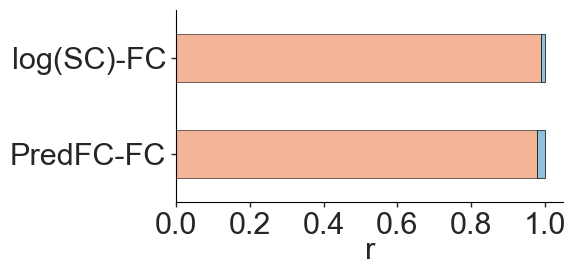

In [35]:
SC_FC_gp_rate = np.mean(corr_SC_FC_mismatch)/np.mean(corr_SC_FC_match)
predFC_FC_gp_rate = np.mean(corr_PredFC_FC_mismatch)/np.mean(corr_PredFC_FC_match)

a0 = np.array([SC_FC_gp_rate])
b0 = np.array([1 - SC_FC_gp_rate])
a1 = np.array([predFC_FC_gp_rate])
b1 = np.array([1 - predFC_FC_gp_rate])

fig, ax2  = plt.subplots(figsize=(5,2.5))
height =0.5
x = [0.5, 1.5]
ax2.barh(x[1], a0, label='Group effect', color=bar_colors[1], height=height, edgecolor='black', linewidth=0.5, alpha=0.8)
ax2.barh(x[1], b0, left=a0, label='Individual effect', color=bar_colors[0],height=height, edgecolor='black', linewidth=0.5)

ax2.barh(x[0], a1, label='Group effect', color=bar_colors[1], height=height, edgecolor='black',  linewidth=0.5, alpha=0.8)
ax2.barh(x[0], b1, left=a1, label='Individual effect', color=bar_colors[0], height=height, edgecolor='black', linewidth=0.5)


plt.ylim([0, 2])
ax2.set_yticks([0.5, 1.5])
plt.xticks(np.arange(0, 1.1, 0.2))
ax2.set_yticklabels(["PredFC-FC",  "log(SC)-FC"],rotation=0)
sns.despine(right=True)
plt.xlabel('r',fontsize=22, labelpad=-2)
plt.xticks(rotation=0, fontsize=22)
plt.tick_params(bottom=True, left=True, width=1)
plt.grid(False)
# plt.savefig('result_plot/Fig3/' + dataset_type +'_group_ind_0927_rate.png', dpi=360, transparent=True ,bbox_inches = 'tight')
plt.show()

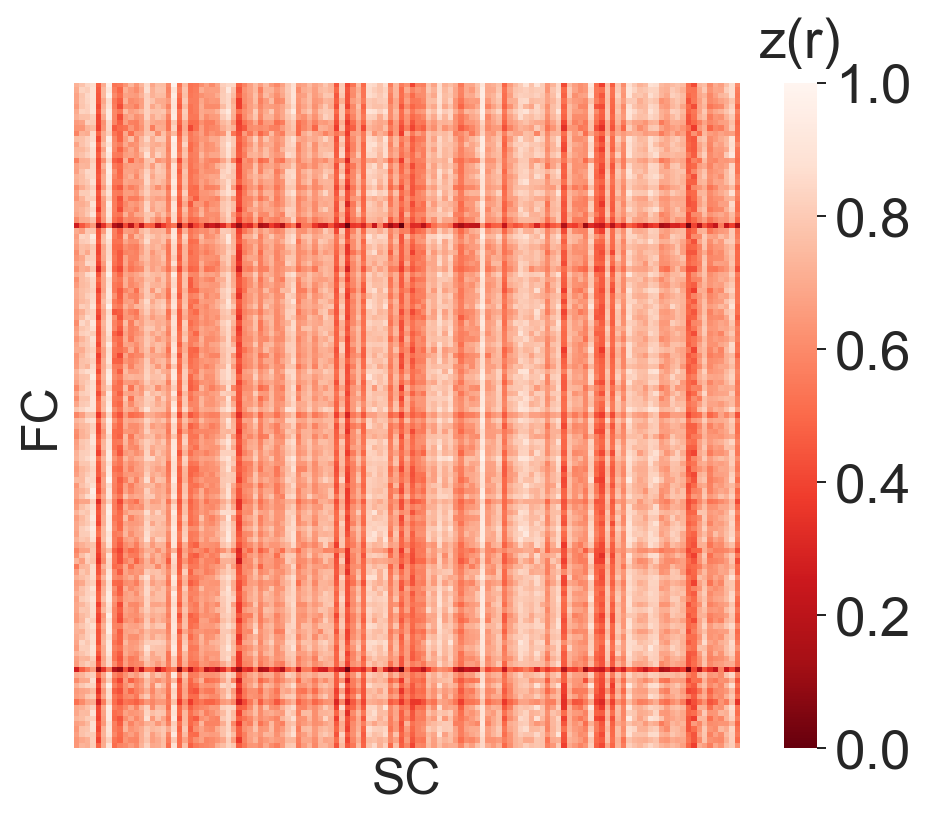

In [64]:
import matplotlib.colors as colors

matrix = PredFC_FC_inter_r
plt.figure(dpi=180)
#
divnorm = colors.TwoSlopeNorm(vmin=0.6, vcenter=0.7,
                              vmax=0.8)
heatmap = plt.imshow((matrix - np.min(matrix))/(np.max(matrix) - np.min(matrix)), cmap='Reds_r')
cbar = plt.colorbar(heatmap)
cbar.outline.set_visible(False)
cbar.ax.xaxis.set_label_position('top')
cbar.ax.set_xlabel('z(r)', labelpad=10)
plt.gca().set_frame_on(False)
plt.xticks([])
plt.yticks([])
# plt.savefig("result_plot/SC_FC_cross_inter_rho_rand_nozero" + ".png")
plt.xlabel('SC', fontsize=20)
plt.ylabel('FC', fontsize=20)

plt.show()